In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from benchmarking import benchmarking

In [2]:
lc_list = [0.3, 0.1, 0.05, 0.025, 0.0175, 0.01, 0.0075, 0.005, 0.0035]
lc_list = [0.3, 0.1, 0.05, 0.025, 0.0175, 0.01, 0.0075, 0.005, 0.0035, 0.0021]
# lc_list = [0.0023]

benchmark_data = pd.DataFrame({
    "dofs": np.array([], dtype=np.int64),
    "Approach": np.array([], dtype=str),
    # "Newton_iteration": np.array([], dtype=np.int64),
    "matrix_assembling": np.array([], dtype=np.float64),
    "matrix_assembling(total)": np.array([], dtype=np.float64),
    "constitutive_model_update": np.array([], dtype=np.float64),
    "constitutive_model_update(total)": np.array([], dtype=np.float64),
})

for lc in lc_list:
    print(f"\nlc = {lc}")
    data_list = benchmarking(lc)
    for data in data_list:
        benchmark_data.loc[len(benchmark_data.index)] = data


lc = 0.3
Approach: interpolation
Newton iterations in total = 1
Approach: JAX
JIT overhead = 0.06905694400000001
Newton iterations in total = 1

lc = 0.1
Approach: interpolation
Newton iterations in total = 1
Approach: JAX
JIT overhead = 0.042306314000000005
Newton iterations in total = 1

lc = 0.05
Approach: interpolation
Newton iterations in total = 1
Approach: JAX
JIT overhead = 0.043864056000000005
Newton iterations in total = 1

lc = 0.025
Approach: interpolation
Newton iterations in total = 1
Approach: JAX
JIT overhead = 0.042462478000000005
Newton iterations in total = 1

lc = 0.0175
Approach: interpolation
Newton iterations in total = 1
Approach: JAX
JIT overhead = 0.052059603
Newton iterations in total = 1

lc = 0.01
Approach: interpolation
Newton iterations in total = 1
Approach: JAX
JIT overhead = 0.046903833000000006
Newton iterations in total = 1

lc = 0.0075
Approach: interpolation
Newton iterations in total = 1
Approach: JAX
JIT overhead = 0.094573789
Newton iterations 

In [ ]:
dofs = benchmark_data["dofs"].unique()
approaches = benchmark_data["Approach"].unique()

def do_plotting(events):
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    for approach in approaches:
        for event in events:
            data = benchmark_data[benchmark_data["Approach"] == approach]
            axes[0].loglog(dofs, data[event], 'o-', label=approach+": "+event)

    for approach in approaches:
        for event in events:
            data = benchmark_data[benchmark_data["Approach"] == approach]
            axes[1].plot(dofs, data[event], 'o-', label=approach+": "+event)

    axes[0].set_title('Log scale')
    axes[1].set_title('Standard scale')
    for i in range(2):
        axes[i].set_xlabel("DoFs of the scalar quadrature functional space of degree 2")
        axes[i].set_ylabel("Time (s)")
        axes[i].legend()
        axes[i].grid()
    # fig.savefig("benchmarking.png")
    # fig.suptitle('Solving an elastoplastic problem via different approaches: interpolation, numba, jax')

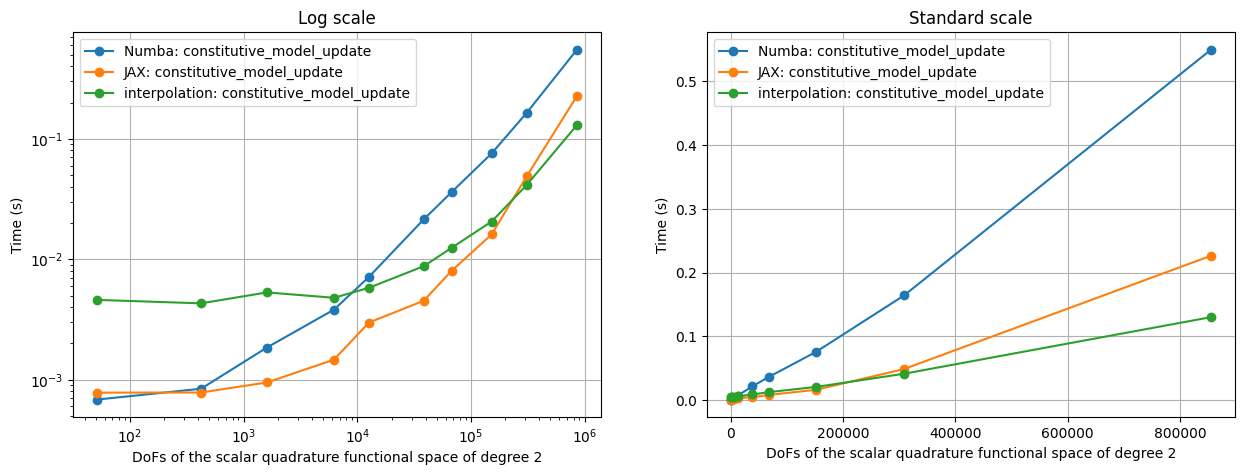

In [ ]:
events = ["constitutive_model_update"]
do_plotting(events)

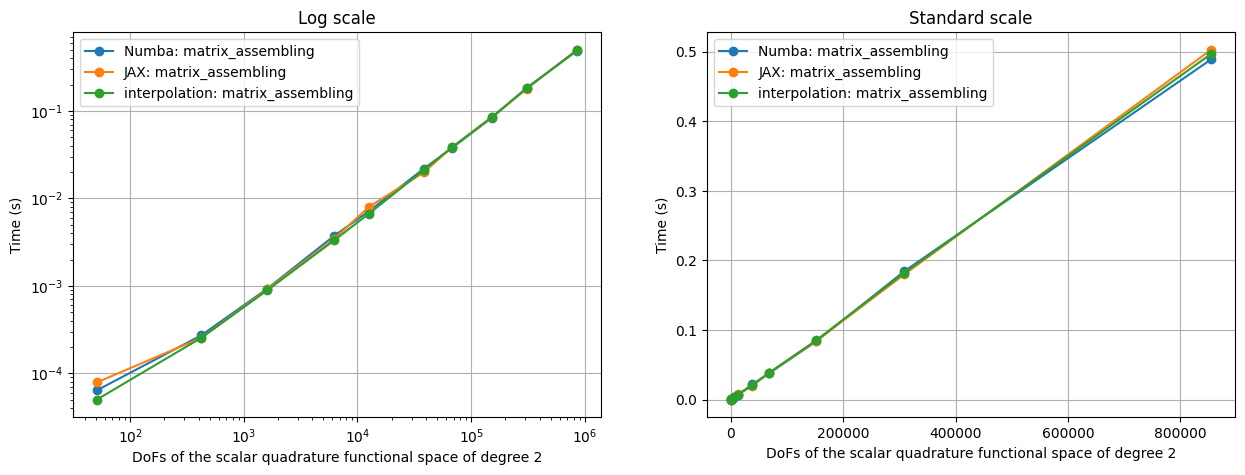

In [6]:
events = ["matrix_assembling"]
do_plotting(events)

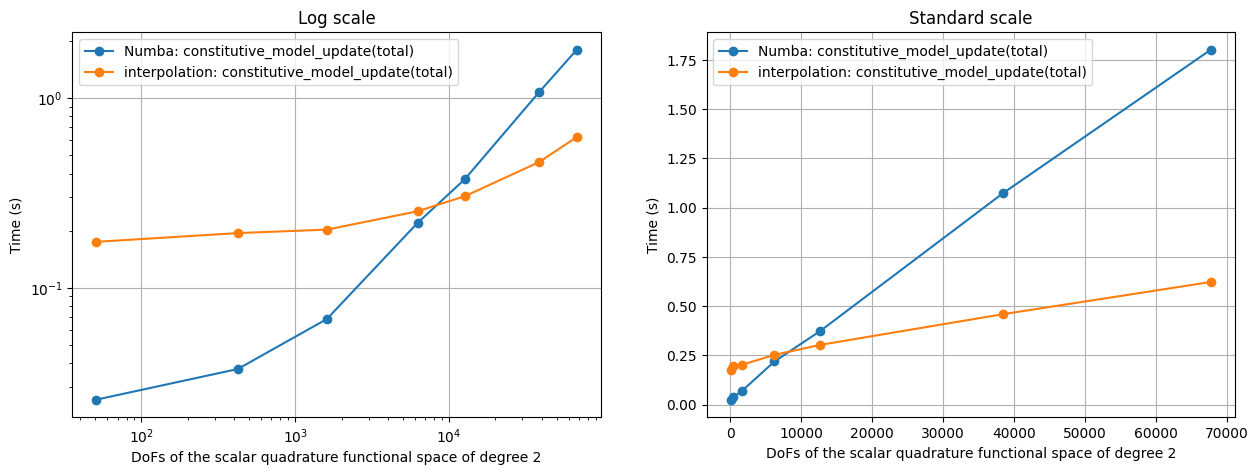

In [14]:
events = ["constitutive_model_update(total)"]
do_plotting(events)

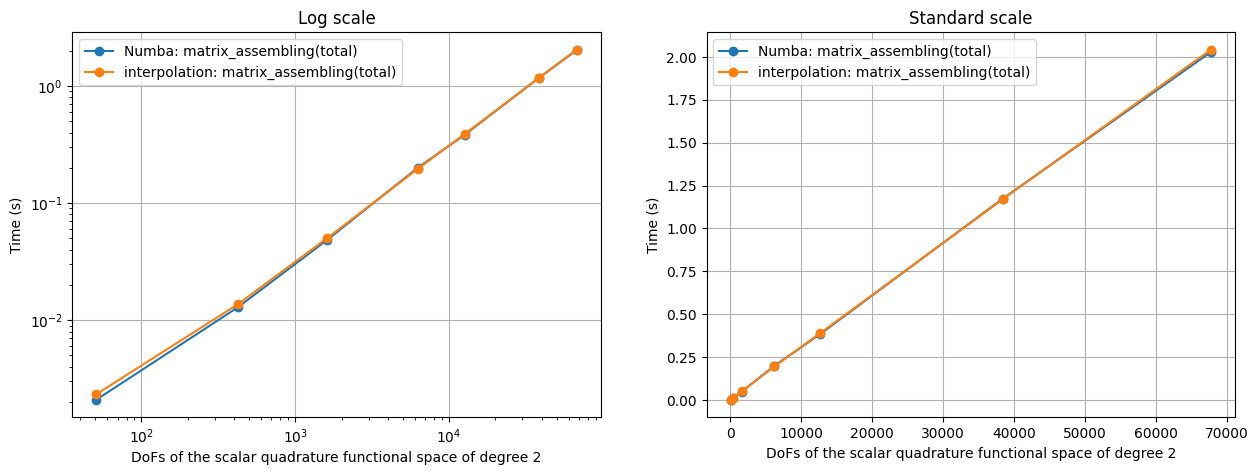

In [13]:
events = ["matrix_assembling(total)"]
do_plotting(events)